# OT03の実験結果，およびシミュレーション結果の描画　（機械学会年次大会向け）

# import

In [78]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import gen_animation as gen
from cea_post import Read_datset as read_cea

matplotlib.style.use("tj_origin.mplstyle")

# データ読み込み・インスタンス化

In [18]:
dic_result = {"ex": "2020_0806_190123_conf_OT03_ex",
              "sim": "2020_0806_185038_conf_OT03",
              "orich": "2020_0806_185313_conf_OT03_Orich",
              "frich": "2020_0806_185218_conf_OT03_Frich",
              "nonpc": "2020_0806_185703_conf_OT03_nonPc"
              }
print("reading \"ex\"\n")
inst_ex = gen.Main(dic_result["ex"])
print("reading \"sim\"\n")
inst_sim = gen.Main(dic_result["sim"])
print("reading \"orich\"\n")
inst_orich = gen.Main(dic_result["orich"])
print("reading \"frich\"\n")
inst_frich = gen.Main(dic_result["frich"])
print("reading \"nonpc\"\n")
inst_nonpc = gen.Main(dic_result["nonpc"])
print("Completed!")

reading "ex"

reading "sim"

reading "orich"

reading "frich"

reading "nonpc"



# 圧力，および酸化剤流量履歴の表示

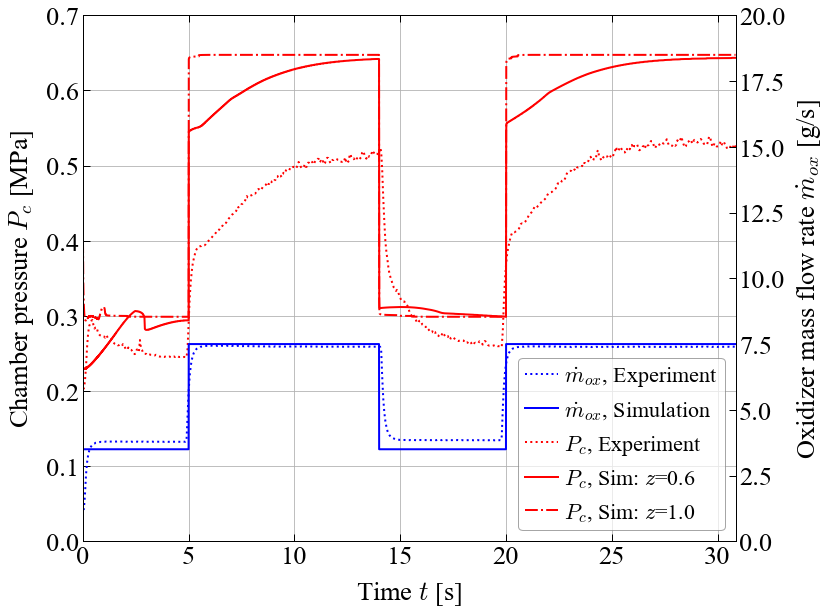

In [33]:
fig_hist = plt.figure(figsize=(12,9))
ax_hist = fig_hist.add_subplot(111)
ax2_hist = ax_hist.twinx()
ax_hist.plot(inst_ex.df["t"], inst_ex.df["Pc"]*1e-6, ls=":", c="r", label="$P_c$, Experiment")
ax_hist.plot(inst_sim.df["t"], inst_sim.df["Pc"]*1e-6, ls="-", c="r", label="$P_c$, Sim: $z$=0.6")
ax_hist.plot(inst_nonpc.df["t"], inst_nonpc.df["Pc"]*1e-6, ls="-.", c="r", label="$P_c$, Sim: $z$=1.0")
ax_hist.set_ylim(0.0, 0.7)
ax_hist.set_xlabel("Time $t$ [s]")
ax_hist.set_ylabel("Chamber pressure $P_c$ [MPa]")
ax2_hist.plot(inst_ex.df["t"], inst_ex.df["mox"]*1e+3, ls=":", c="b", label="$\dot m_{ox}$, Experiment")
ax2_hist.plot(inst_sim.df["t"], inst_sim.df["mox"]*1e+3, ls="-", c="b", label="$\dot m_{ox}$, Simulation")
ax2_hist.set_ylabel("Oxidizer mass flow rate $\dot m_{ox}$ [g/s]")
ax2_hist.set_ylim(0.0, 20.0)
hl1, lalbel1 = ax_hist.get_legend_handles_labels()
hl2, lalbel2 = ax2_hist.get_legend_handles_labels()
ax_hist.legend(hl2+hl1, lalbel2+lalbel1, loc="lower right", fontsize=22)
ax_hist.grid()
fig_hist.savefig("Pc_history.png", dpi=300)

# 後退形状履歴の表示

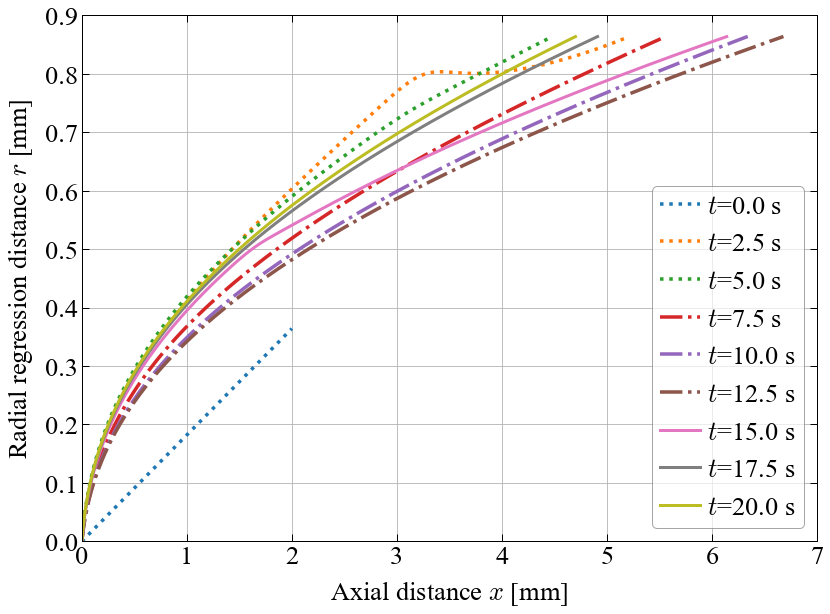

In [65]:
time_list = [0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0]
x_array = np.array([float(x) for x in inst_sim.df_r.columns])

fig_shape = plt.figure(figsize=(12,9))
ax_shape = fig_shape.add_subplot(111)
for t in time_list:
    if t<5.01:
        ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls=":", lw=3.5, label="$t$={} s".format(round(t, 2)))
    elif 5.01<=t and t<14.0:
        ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls="-.", lw=3.5, label="$t$={} s".format(round(t, 2)))
    else:
        ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls="-", lw=3, label="$t$={} s".format(round(t, 2)))
ax_shape.set_ylim(0.0, 0.9)
ax_shape.set_xlim(0.0, 7.0)
ax_shape.set_xlabel("Axial distance $x$ [mm]")
ax_shape.set_ylabel("Radial regression distance $r$ [mm]")
ax_shape.legend(loc="lower right")
ax_shape.grid()
fig_shape.savefig("r_history.png", dpi=300)

# 特性排気速度，O/F，および燃料流量履歴の表示

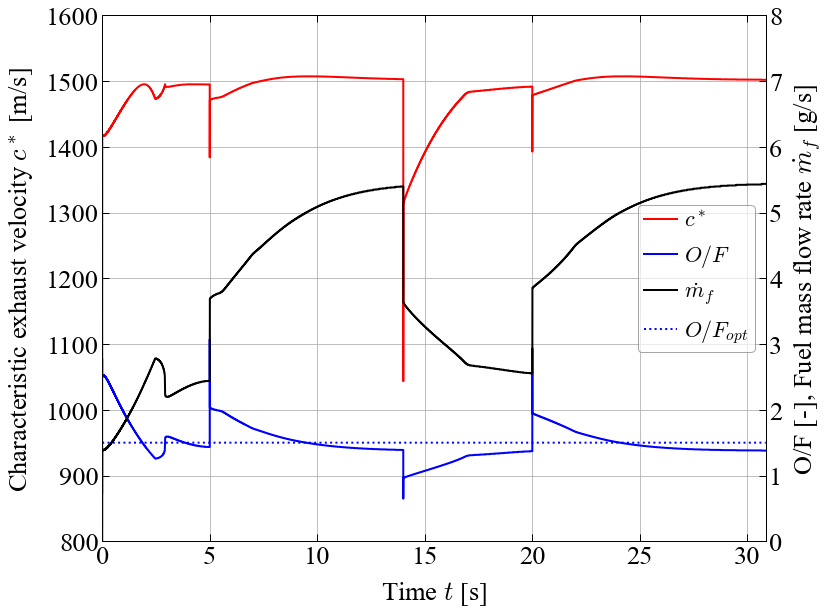

In [75]:
fig_cstr = plt.figure(figsize=(12,9))
ax_cstr = fig_cstr.add_subplot(111)
ax2_cstr = ax_cstr.twinx()
ax_cstr.plot(inst_sim.df["t"], inst_sim.df["cstr"], ls="-", c="r", label="$c^*$")
ax_cstr.set_ylim(800, 1600)
ax_cstr.set_xlabel("Time $t$ [s]")
ax_cstr.set_ylabel("Characteristic exhaust velocity $c^*$ [m/s]")
ax2_cstr.plot(inst_sim.df["t"], inst_sim.df["of"], ls="-", c="b", label="$O/F$")
ax2_cstr.plot(inst_sim.df["t"], inst_sim.df["mf"]*1e+3, ls="-", c="k", label="$\dot m_f$")
ax2_cstr.plot(inst_sim.df["t"], np.array([1.5 for i in inst_sim.df["t"]]), ls=":", c="b", label="$O/F_{opt}$")
ax2_cstr.set_ylabel("O/F [-], Fuel mass flow rate $\dot m_f$ [g/s]")
ax2_cstr.set_ylim(0.0, 8)
hl_cstr1, lalbel_cstr1 = ax_cstr.get_legend_handles_labels()
hl_cstr2, lalbel_cstr2 = ax2_cstr.get_legend_handles_labels()
ax_cstr.legend(hl_cstr1+hl_cstr2, lalbel_cstr1+lalbel_cstr2, loc="center right", fontsize=22)
ax_cstr.grid()
fig_cstr.savefig("cstr_history.png", dpi=300)

# cstr v.s. O/F のグラフ表示

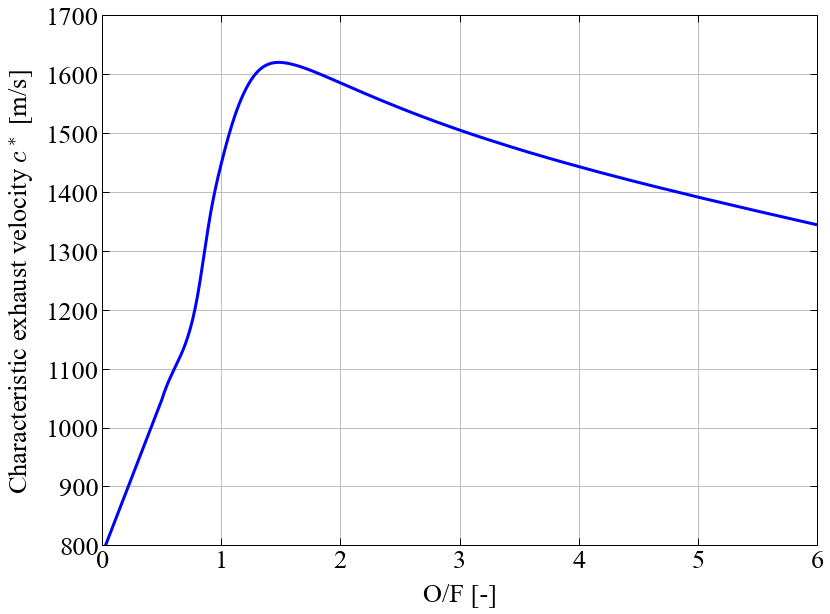

In [82]:
dbfld_path = os.path.join("cea_db", "GOX_CurableResin", "csv_database")
inst_cea = read_cea(dbfld_path)
func_cstr = inst_cea.gen_func("CSTAR", extraporate="linear")
of_range = np.arange(0.01, 6.0, 0.01)

fig_cea = plt.figure(figsize=(12, 9))
ax_cea = fig_cea.add_subplot(111)
ax_cea.plot(of_range, np.array([func_cstr(of, 0.4e+6) for of in of_range]), c="b", lw=3)
ax_cea.set_xlabel("O/F [-]")
ax_cea.set_ylabel("Characteristic exhaust velocity $c^*$ [m/s]")
ax_cea.set_xlim(0, 6.0)
ax_cea.set_ylim(800, 1700)
ax_cea.grid()
fig_cea.savefig("cstr_vs_of.png", dpi=300)